In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
import scipy as sp

4.1.21, 4.2.4, 5.1.21, 5.2

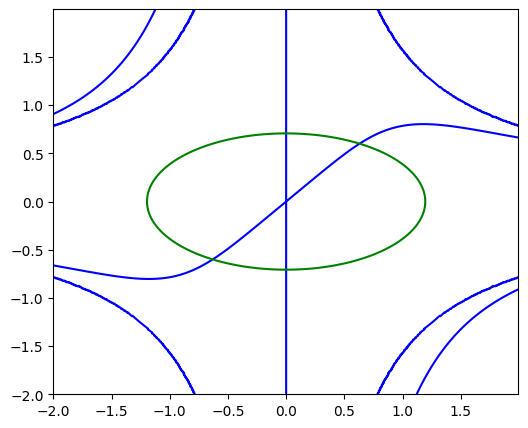

In [2]:
x, y = np.meshgrid(np.arange(-2, 2, 0.005), np.arange(-2, 2, 0.005))
plt.figure(figsize=(6, 5))
plt.contour(x, y, np.tan(x*y) - x**2, [0], colors=['blue'])
plt.contour(x, y, 0.7*x**2 + 2*y**2 - 1, [0], colors=['green'])
plt.show()

In [2]:
x1, x2 = symbols('x1 x2')
f11 = tan(x1*x2) - x1*x1
f12 = 0.7*x1*x1 + 2*x2*x2 - 1

X = Matrix([x1, x2])
F1 = Matrix([f11, f12])

In [10]:
def newton_method(F, eps, initial):
    x_initial = np.array(initial)
    iteration_number = 0
    jacobian = F.jacobian(X)
    while np.linalg.norm(np.array(F.subs(zip(X, x_initial)),dtype=float).flatten()) > eps:
        iteration = np.array(
            (jacobian.inv()*F) #Final equation from the textbook
            .subs(zip(X, x_initial)), dtype=float).flatten()
        x_initial = x_initial - iteration # Iteration
        iteration_number += 1
    return x_initial, iteration_number

In [11]:
def solve_F1_scipy(x_initial):
    def function(variable: np.array):
        return np.array([np.tan(variable[0]*variable[1]) - variable[0] * variable[0],
                         0.7*variable[0]*variable[0] + 2*variable[1]*variable[1] - 1], dtype=float)
    solution = sp.optimize.fsolve(function, np.array(x_initial), xtol=0.000001)
    return solution

In [12]:
print(f"Newton's method: {newton_method(F1, 0.000001, [0, -0.5])}; Scipy's fsolve: {solve_F1_scipy([0, -0.5])}")
print(f"Newton's method: {newton_method(F1, 0.000001, [0, 0.5])}; Scipy's fsolve: {solve_F1_scipy([0, 0.5])}")
print(f"Newton's method: {newton_method(F1, 0.000001, [0.6, 0.6])}; Scipy's fsolve: {solve_F1_scipy([0.6, 0.6])}")
print(f"Newton's method: {newton_method(F1, 0.000001, [-0.6, -0.6])}; Scipy's fsolve: {solve_F1_scipy([-0.6, -0.6])}")

Newton's method: (array([ 0.        , -0.70710678]), 4); Scipy's fsolve: [-3.32755171e-26 -7.07106781e-01]
Newton's method: (array([0.        , 0.70710678]), 4); Scipy's fsolve: [1.58173704e-26 7.07106781e-01]
Newton's method: (array([0.63102535, 0.60052681]), 3); Scipy's fsolve: [0.63102535 0.60052681]
Newton's method: (array([-0.63102535, -0.60052681]), 3); Scipy's fsolve: [-0.63102535 -0.60052681]


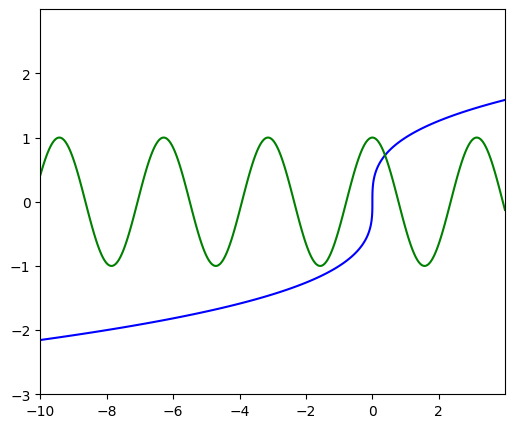

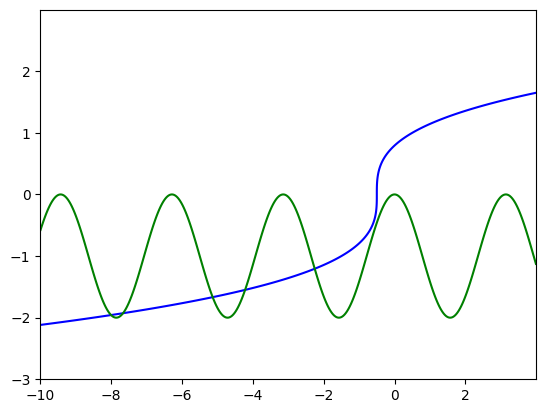

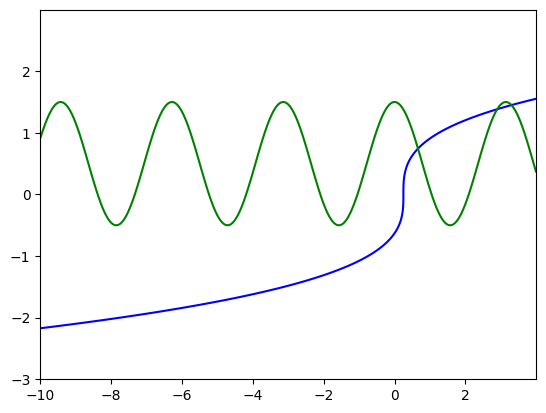

In [2]:
x, y = np.meshgrid(np.arange(-10, 4, 0.001), np.arange(-3, 3, 0.001))
plt.figure(figsize=(6, 5))
alpha = [0, 1, -0.5]
for al in alpha:
    plt.contour(x, y, x - y**3 + 0.5 * al, [0], colors=['blue'])
    plt.contour(x, y, np.cos(2*x) - y - al, [0], colors=['green'])
    plt.show()

In [6]:
a = symbols('a')
f21 = x1 - x2**3 + 0.5 * a
f22 = cos(2*x1) - x2 - a

F2 = Matrix([f21, f22])

In [7]:
def newton_method_simplified(F, eps, initial):
    x_initial = np.array(initial)
    iteration_number = 0
    jacobian = F.jacobian(X).subs(zip(X, x_initial))
    while np.linalg.norm(np.array(F.subs(zip(X, x_initial)),dtype=float).flatten()) > eps:
        iteration = np.array((jacobian.inv()*F).subs(zip(X, x_initial)), dtype=float).flatten()
        x_initial = x_initial - iteration
        iteration_number += 1
    return x_initial, iteration_number

In [8]:
print(newton_method_simplified(F2.subs([(a, alpha[0])]), 0.00001, [0.3, 0.7]))

(array([0.38025858, 0.72448048]), 5)


In [9]:
print(newton_method_simplified(F2.subs([(a,alpha[1])]), 0.00001, [-2, -1.5]))
print(newton_method_simplified(F2.subs([(a,alpha[1])]), 0.00001, [-4, -1.6]))
print(newton_method_simplified(F2.subs([(a,alpha[1])]), 0.00001, [-5.5, -1.7]))
print(newton_method_simplified(F2.subs([(a,alpha[1])]), 0.00001, [-7.6, -2]))
print(newton_method_simplified(F2.subs([(a,alpha[1])]), 0.00001, [-8, -2]))

(array([-2.25261906, -1.20567293]), 11)
(array([-4.21765437, -1.54913632]), 6)
(array([-5.13268286, -1.66703306]), 7)
(array([-7.66258537, -1.92762809]), 6)
(array([-8.00034007, -1.95746345]), 4)


In [10]:
print(newton_method_simplified(F2.subs([(a,alpha[2])]), 0.00001, [0.7, 0.8]))
print(newton_method_simplified(F2.subs([(a,alpha[2])]), 0.00001, [2.4, 1.6]))
print(newton_method_simplified(F2.subs([(a,alpha[2])]), 0.00001, [2.7, 1.7]))


(array([0.66207542, 0.74415181]), 4)
(array([2.89776215, 1.38343741]), 18)
(array([2.89777867, 1.38344208]), 14)


In [14]:
A = np.array([[7.92  , 3.36 , -2.24 , 1.98],
              [-13.86, 18.20, 0     , 3.96 ],
              [-2.97 , 0.20 , 4.80  , 0    ],
              [5.94  , 0    , -10.60, 16.83]])
b = np.array([14.556, -100.54, -1.27, -71.31])

B = np.empty(A.shape, dtype=float)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        B[i, j] = - A[i, j] / A[i, i] if i != j else 0

c = np.empty(b.shape, dtype=float)
for i in range(c.shape[0]):
    c[i] = b[i] / A[i, i]

print(np.linalg.norm(B, ord=np.inf) < 1)


def zeid_iterations(B, x0, n):
    answer = x0
    for _ in range(n):
        iteration = np.zeros(answer.shape, dtype=float)
        for i in range(B.shape[0]): # x_new = B1 @ x_new + B2 @ x + c
            iteration[i] = np.sum(B[i][:i] * iteration[:i]) + np.sum(B[i][i:] * answer[i:]) + c[i]
        answer = iteration
    return answer


initial_values = [np.zeros(b.shape[0]), np.ones(b.shape[0])]
for initial in initial_values:
    x_true = np.linalg.solve(A, b)
    x_zeid = zeid_iterations(B, initial, 10)
    print(f"Initial guess: {initial}")
    print(f"Gauss: {x_true = }")
    print(f"Seidel: {x_zeid = }")

    print(f"Absolute error: {np.linalg.norm(x_true - x_zeid, ord=np.inf)}\n")

True
Initial guess: [0. 0. 0. 0.]
Gauss: x_true = array([ 4.17031201, -1.4316858 ,  2.3754508 , -4.21282679])
Seidel: x_zeid = array([ 4.17031253, -1.43168539,  2.3754511 , -4.21282678])
Absolute error: 5.203217883220645e-07

Initial guess: [1. 1. 1. 1.]
Gauss: x_true = array([ 4.17031201, -1.4316858 ,  2.3754508 , -4.21282679])
Seidel: x_zeid = array([ 4.17031263, -1.43168531,  2.37545116, -4.21282678])
Absolute error: 6.25362384987227e-07



In [15]:
def zeid_epsilon(B, x0, eps):
    B1 = np.zeros(B.shape)
    B2 = np.zeros(B.shape)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            if j < i:
                B1[i, j] = B[i, j]
            if j > i:
                B2[i, j] = B[i, j]
    # B1 - strictly lower triangular matrix
    # B2 - strictly upper triangular matrix

    iterations_number = 0
    answer = x0
    error = 1

    while error > eps:
        x_new = np.zeros(answer.shape, dtype=float)
        for i in range(B.shape[0]): # x_new = B1 @ x_new + B2 @ x + c
            x_new[i] = np.sum(B[i][:i] * x_new[:i]) + np.sum(B[i][i:] * answer[i:]) + c[i]

        # Known formula - stop criteria
        error = np.linalg.norm(answer - x_new) * np.linalg.norm(B2, ord=np.inf) / (1 - np.linalg.norm(B, ord=np.inf))

        answer = x_new
        iterations_number += 1
    return answer, iterations_number

x_zeid = zeid_epsilon(B, np.zeros(b.shape[0]), 0.000001)
print(f"Seidel: {x_zeid = }")



Seidel: x_zeid = (array([ 4.17031201, -1.4316858 ,  2.3754508 , -4.21282679]), 14)
